In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read csv
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

#peak into data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


## Wrangling Time Series Data

In [3]:
#Convert column to datetime
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
#Rename columns
df= df.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
df.set_index('ds', inplace = True)
df.head(2)

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635


In [6]:
df_daily = df.resample('D').sum()
df_daily.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


### Question 11

In [7]:
df_daily.reset_index(inplace = True)

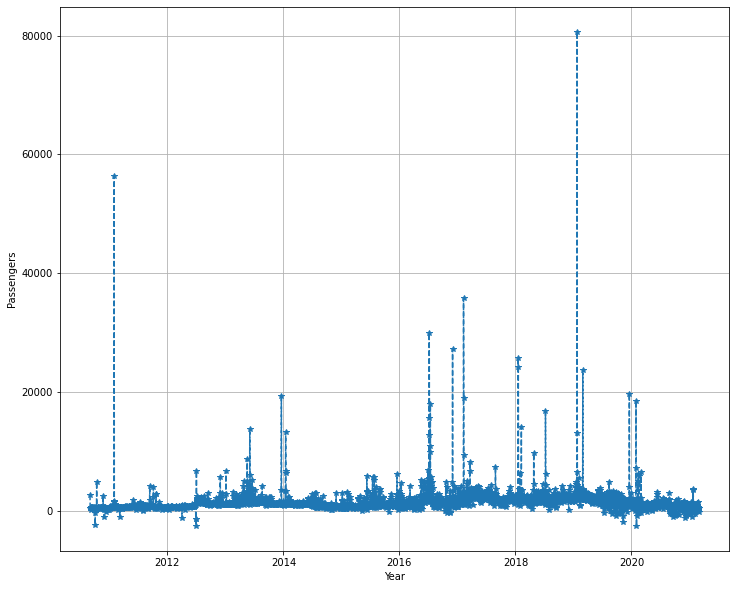

In [8]:
# visualizing
plt.figure(figsize= (12,10))
plt.plot(df_daily.ds, df_daily.y, '--', marker = '*' )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers');

### Question 12

In [9]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['SysLoad'])
print('ADF Statistic: {}'.format(adf_result[0]))
print('p-value: {}'.format(adf_result[1]))
print('No. of lags used: {}'.format(adf_result[2]))
print('No. of observations used: {}'.format(adf_result[3]))
print('Critical Values:')
for k, v in adf_result[4].items():
    print('{}: {}'.format(k, v))


ADF Statistic: -3.690158988836651
p-value: 0.00425372550457405
No. of lags used: 30
No. of observations used: 3803
Critical Values:
1%: -3.432070672988693
5%: -2.8623002987378547
10%: -2.567174716967499


In [10]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['GasPrice'])
print('ADF Statistic: {}'.format(adf_result[0]))
print('p-value: {}'.format(adf_result[1]))
print('No. of lags used: {}'.format(adf_result[2]))
print('No. of observations used: {}'.format(adf_result[3]))
print('Critical Values:')
for k, v in adf_result[4].items():
    print('{}: {}'.format(k, v))


ADF Statistic: -2.902766697165184
p-value: 0.045027212884624954
No. of lags used: 27
No. of observations used: 3806
Critical Values:
1%: -3.4320693157877544
5%: -2.8622996992165364
10%: -2.5671743978048323


### Question 13

In [11]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['y'])
print('ADF Statistic: {}'.format(adf_result[0]))
print('p-value: {}'.format(adf_result[1]))
print('No. of lags used: {}'.format(adf_result[2]))
print('No. of observations used: {}'.format(adf_result[3]))
print('Critical Values:')
for k, v in adf_result[4].items():
    print('{}: {}'.format(k, v))


ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used: 3813
Critical Values:
1%: -3.432066157296446
5%: -2.8622983040036005
10%: -2.5671736550459663


In [12]:
df_daily=df_daily.rename(columns={'SysLoad': 'add1','Tmax': 'add2', 'GasPrice':'add3'})
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3834 non-null   datetime64[ns]
 1   add2    3834 non-null   float64       
 2   add1    3834 non-null   float64       
 3   add3    3834 non-null   float64       
 4   y       3834 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 149.9 KB


In [13]:
Train_df = df_daily.iloc[:2757]
Test_df = df_daily.iloc[2757:]

In [14]:
train_df=Train_df.drop(columns=['add1', 'add2', 'add3'])
train_df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [15]:
test_df = Test_df.drop(columns=['add1', 'add2', 'add3'])
test_df.head()

,ds,y
2757,2018-03-20,1833.00
2758,2018-03-21,1730.49
2759,2018-03-22,2260.55
2760,2018-03-23,2138.76
2761,2018-03-24,1721.70


In [16]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [17]:
model = Prophet()
model.fit(train_df)

10:39:03 - cmdstanpy - INFO - Chain [1] start processing
10:39:04 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
pred = model.predict(test_df)

In [19]:
forecast = pred[['ds', 'yhat']]
forecast.head()

,ds,yhat
0,2018-03-20,2529.569840
1,2018-03-21,2682.879210
2,2018-03-22,2781.887082
3,2018-03-23,2574.023384
4,2018-03-24,2249.244287


### Question 14

In [20]:
def MAPE (actual, pred):
    diff= 0
    for a,b in zip(actual, pred):
        diff += (abs(a-b)/abs(a))*100

    return diff/len(actual)

round(MAPE(test_df['y'], forecast['yhat']),2)

544.95

### Question 15

In [21]:
from sklearn.metrics import mean_squared_error
mse =np.sqrt(mean_squared_error(test_df['y'], forecast['yhat']))
round(mse,2)

3208.69

### Question 16

In [22]:
pred[pred['yhat'] == pred['yhat'].max()]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
842,2020-07-09,3354.673133,1944.292782,7425.928312,2242.531582,4465.505088,1348.660301,1348.660301,1348.660301,257.118925,257.118925,257.118925,1091.541376,1091.541376,1091.541376,0.0,0.0,0.0,4703.333434


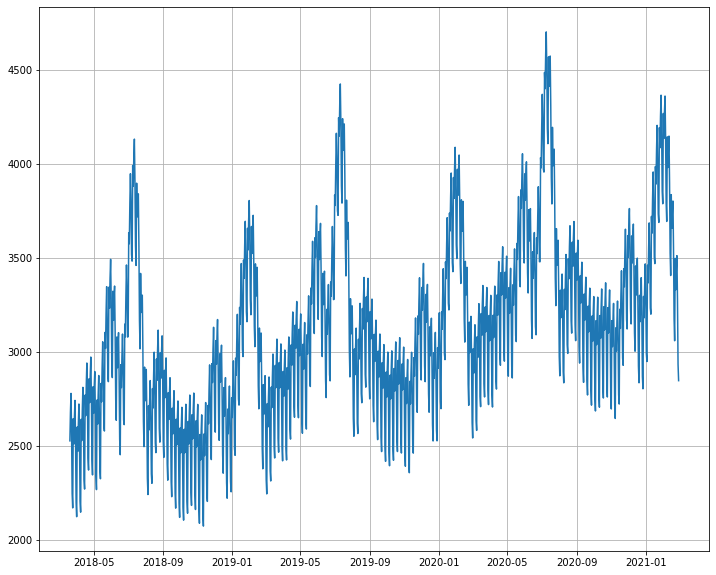

In [23]:
plt.figure(figsize= (12,10))
plt.plot(pred['ds'], pred['yhat'])
plt.grid()

In [24]:
# Multivatiate model
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')


In [25]:
model2.fit(Train_df)

10:39:07 - cmdstanpy - INFO - Chain [1] start processing
10:39:08 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
pred2 = model2.predict(Test_df)
pred2.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1871.425703,-148.255525,4339.920182,1871.425703,1871.425703,-856.023836,-856.023836,-856.023836,0.235284,...,-84.454595,-84.454595,-84.454595,-39.207363,-39.207363,-39.207363,0.0,0.0,0.0,1991.380760
1,2018-03-21,1872.124165,-263.056721,3964.075151,1872.124165,1872.124165,-1025.966566,-1025.966566,-1025.966566,0.232493,...,42.535850,42.535850,42.535850,-29.885751,-29.885751,-29.885751,0.0,0.0,0.0,1982.874763


### Question 17

In [27]:
round(MAPE(Test_df['y'], pred2['yhat']),2)

234.25

### Question 18

In [28]:
round(np.sqrt(mean_squared_error(Test_df['y'], pred2['yhat'])),2)

2710.17

### Question 19

In [29]:
pred2[pred2['yhat'] == pred2['yhat'].max()]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
443,2019-06-06,2180.843939,3880.399638,8473.572136,1977.667173,2369.048679,239.511175,239.511175,239.511175,0.251172,...,145.665478,145.665478,145.665478,129.518416,129.518416,129.518416,0.0,0.0,0.0,6115.248242


In [30]:
week1 = pred2[:7 :]

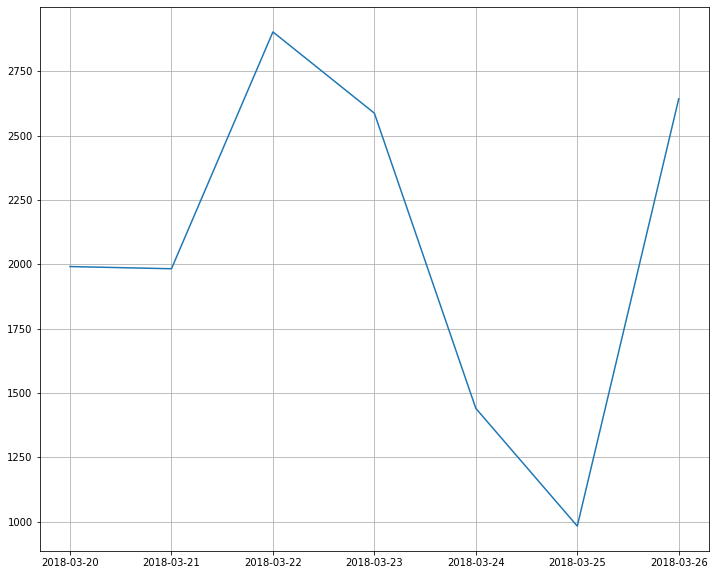

In [31]:
plt.figure(figsize= (12,10))
plt.plot(week1['ds'], week1['yhat'])
plt.grid()

### Question 20

In [32]:
Train_df.drop(columns=['add2'])
Test_df.drop(columns=['add2'])
model3 = Prophet()
model3.add_regressor('add1')
model3.add_regressor('add3')
model3.fit(Train_df)
pred3 = model3.predict(Test_df)
round(MAPE(Test_df['y'], pred3['yhat']),2)

10:39:11 - cmdstanpy - INFO - Chain [1] start processing
10:39:11 - cmdstanpy - INFO - Chain [1] done processing


235.21